In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# To generate GIFs for illustration

import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
import tarfile
import os
import glob
import tensorflow as tf
import tensorflow.keras as k
import matplotlib.pyplot as plt
import numpy as np

# generator model

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    # Fully connected layer:
    model.add(layers.Dense(25*25*128, use_bias=False, input_shape=(100,)))
    # Batch normm
    model.add(layers.BatchNormalization())
    # Activation function
    model.add(layers.LeakyReLU())
    # Reshape
    model.add(layers.Reshape((25, 25, 128)))
    # Layer 2: Hint use layers.Conv2DTranspose with 5x5 kernels and appropriate stride
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 25, 25, 64) # Note: None is the batch size
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    # Layer 3
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 50, 50, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    # Layer 4
    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 100, 100, 32)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    # Layer 5
    model.add(layers.Conv2DTranspose(16, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 100, 100, 16)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    # Layer 6
    model.add(layers.Conv2DTranspose(8, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 200, 200, 8)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    #Layer7
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 200, 200, 3)


    return model

In [ ]:
generator = make_generator_model()

# discriminator model

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    # Layer 1: use layers.Conv2D with 5x5 kernels and appropriate stride
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[200, 200, 3]))
    # Activation function
    model.add(layers.LeakyReLU())
    # Dropout
    model.add(layers.Dropout(0.25))
    # Layer 2
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.25))
    # Layer 2
    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.25))
    # Fully connected layer
    model.add(layers.Flatten())
    #model.add(layers.Dense(256))
    #model.add(layers.LeakyReLU())
    #model.add(layers.Dropout(0.25))
    model.add(layers.Dense(1))
    return model

In [ ]:
discriminator = make_discriminator_model()

# loss function

In [ ]:
# This method returns a helper function to compute the binary cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output),fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    generator_loss = cross_entropy(tf.ones_like(fake_output),fake_output)
    return generator_loss

learning_rate = 1e-4
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# restore the model

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp -r "/content/gdrive/My Drive/w_faces_gan_cp_5/" "w_faces_gan_cp_5"  #move file from A to B

In [ ]:
"""# restore check point"""

checkpoint_dir = './w_faces_gan_cp_5'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

status = checkpoint.restore(tf.train.latest_checkpoint('./w_faces_gan_cp_5'))



# generate non-existing faces

(1, 200, 200, 3)


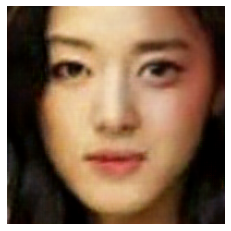

In [ ]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
print(generated_image.shape)

plt.imshow((np.squeeze(generated_image) + 1) /2 )
plt.axis('off')
plt.show()

(1, 200, 200, 3)


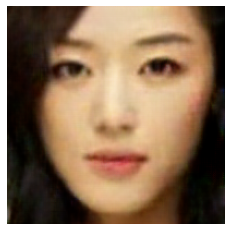

In [ ]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
print(generated_image.shape)

plt.imshow((np.squeeze(generated_image) + 1) /2 )
plt.axis('off')
plt.show()

In [ ]:
def generate_and_save_images(model, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow((np.squeeze((predictions[i]+1)/2)))
      plt.axis('off')
  plt.show()

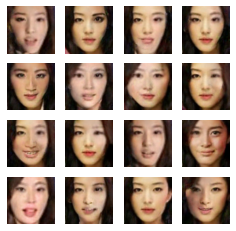

In [ ]:
noise_dim = 100
num_examples_to_generate = 16 # For visualization
noise_vector = tf.random.normal([num_examples_to_generate, noise_dim])

generate_and_save_images(generator, noise_vector)

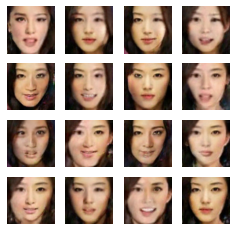

In [ ]:
noise_dim = 100
num_examples_to_generate = 16 # For visualization
noise_vector = tf.random.normal([num_examples_to_generate, noise_dim])

generate_and_save_images(generator, noise_vector)

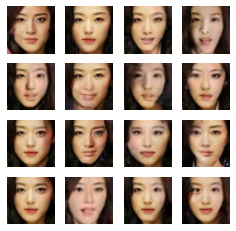

In [ ]:
noise_dim = 100
num_examples_to_generate = 16 # For visualization
noise_vector = tf.random.normal([num_examples_to_generate, noise_dim])

generate_and_save_images(generator, noise_vector)

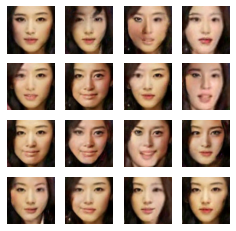

In [ ]:
noise_dim = 100
num_examples_to_generate = 16 # For visualization
noise_vector = tf.random.normal([num_examples_to_generate, noise_dim])

generate_and_save_images(generator, noise_vector)